# Find functions that can be used with subquery and figure out how these functions are executed logically.

Functions that can be used along side with subquery:
- EXISTS: check if there is a record in the subquery
- IN: check for specific values in the column recorded from the subquery
- ANY: comparison to a certain set of values to check if the condition is true on ANY value
- ALL: comparison to a certain set of values to check if the condition is true on ALL values

# EXISTS vs IN, which is faster, why?

Experiment conduction:
- Compare the performance of EXISTS vs IN queries based on execution time.
- The queries should have to same output.
- The dataset consists of 1004480 rows.

## Using EXISTS

~~~~sql
EXPLAIN ANALYZE
SELECT *
FROM bank
WHERE EXISTS (
    SELECT id
    FROM bank
);
~~~~

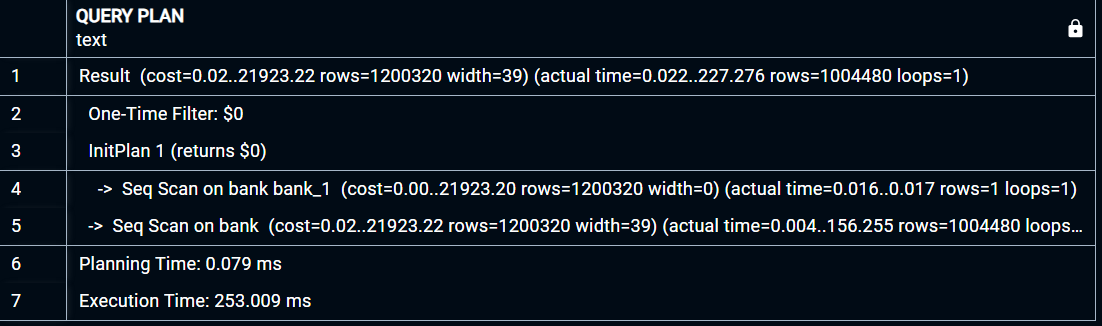

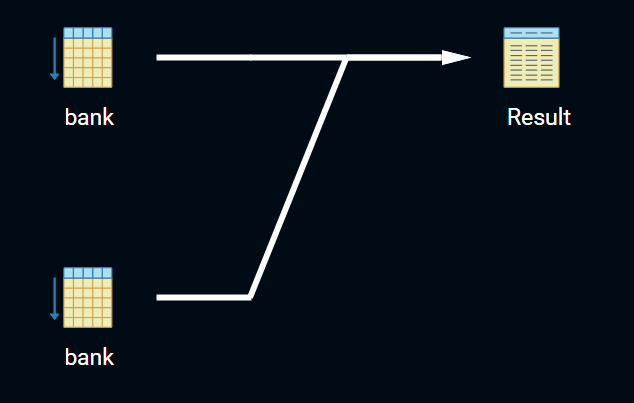

## Using IN

~~~~sql
EXPLAIN ANALYZE
SELECT *
FROM bank
WHERE id in (
    SELECT id
    FROM bank
);
~~~~

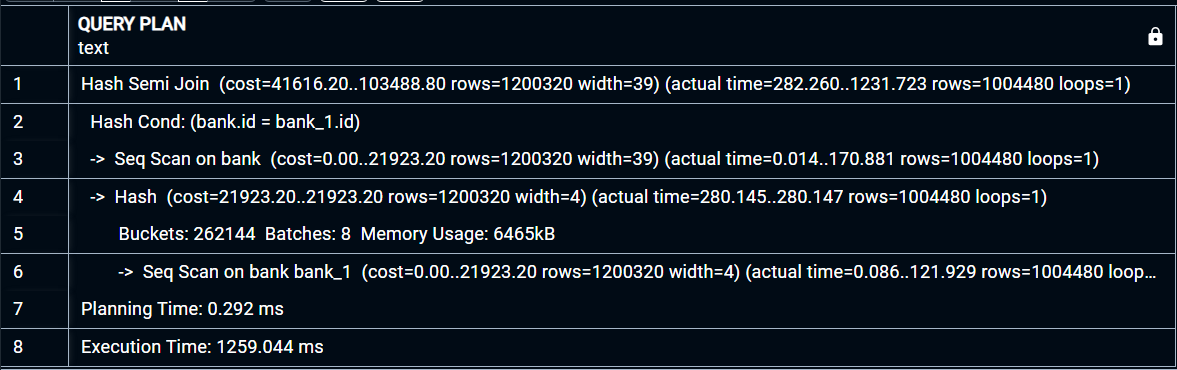

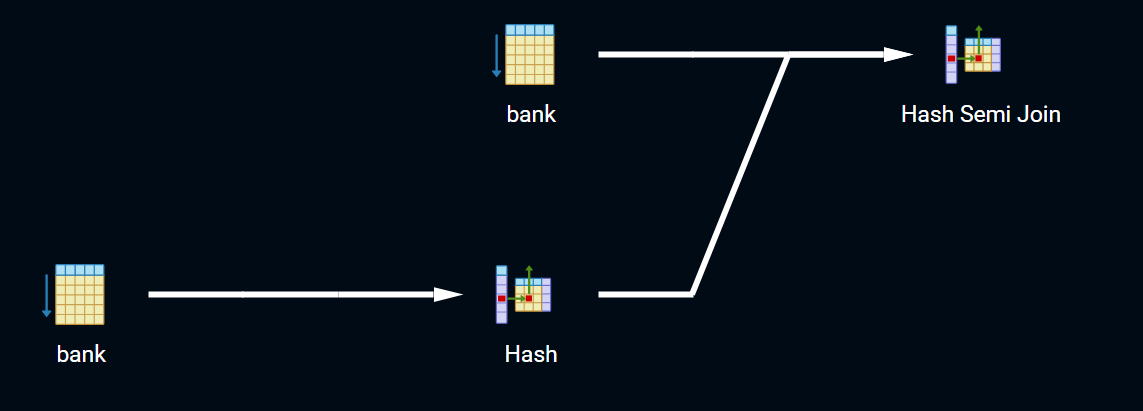

## Statistics over 20 runs

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/EXISTS_IN_Stats.csv')
df.head(6)

,exe_exists,exe_in
0,247.436,1297.422
1,264.564,1280.539
2,266.870,1282.220
3,263.434,1333.999
4,271.798,1299.541
5,274.848,1251.871


### EXISTS

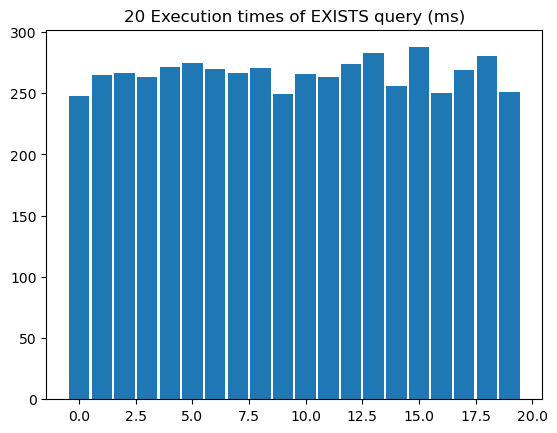

In [3]:
x_label = range(20)
exe_time_exists = df['exe_exists']
width = 0.9 # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(20)

p = ax.bar(x_label, exe_time_exists, width, bottom=bottom)

ax.set_title('20 Execution times of EXISTS query (ms)')

plt.show()

### IN

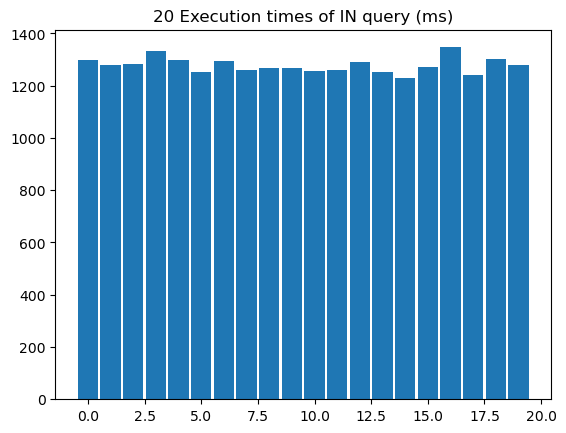

In [10]:
x_label = range(20)
exe_time_in = df['exe_in']
width = 0.9 # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(20)

p = ax.bar(x_label, exe_time_in, width, bottom=bottom)

ax.set_title('20 Execution times of IN query (ms)')

plt.show()

### Mean, Median and Standard Deviation of each query type

In [11]:
stat_df = pd.DataFrame()
stat_df['Mean'] = df[['exe_exists', 'exe_in']].mean()
stat_df['Median'] = df[['exe_exists', 'exe_in']].median()
stat_df['Standard Deviation'] = df[['exe_exists', 'exe_in']].std()
stat_df = stat_df.round(2)

stat_df

,Mean,Median,Standard Deviation
exe_exists,266.22,266.66,11.27
exe_in,1278.09,1275.45,29.39


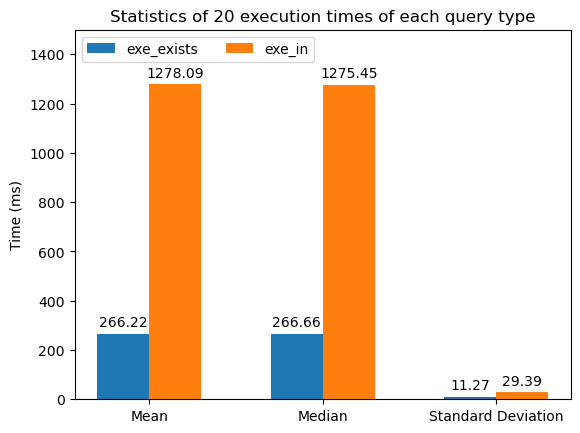

In [14]:
stats = stat_df.columns
query_data = stat_df.T

x = np.arange(len(stats))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for key, values in query_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, values, width, label=key)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (ms)')
ax.set_title('Statistics of 20 execution times of each query type')
ax.set_xticks(x + width / 2, stats)

ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1500)

plt.show()

Based on the chart above, it can be concluded that: when the results are the same across queries, the EXISTS query is the better in terms of performance time comparing to IN query.

It is expected due to the functionality of each query solving different problems. While EXISTS enables a flag for checking if a subquery returns a row or not (O(1)), IN tries to search for specific value in a range of values (O(logn)).